In [1]:
# Overview:
# This script preprocesses the data in nsdp_delays_random.xlsx getting it ready to be used for reporting and analytics in PowerBI

# This snippet below reads the data from nsdp_delays_random.xlsx into a DataFrame df_nspd_delays
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Define the file path
file_path = "/Users/Society/Downloads/NSDP_challenge/nsdp_delays_random.xlsx"

# Read the Excel file into a DataFrame
df_nspd_delays = pd.read_excel(file_path, sheet_name="Sheet1")

# Display the first few rows of the DataFrame
print(df_nspd_delays.head())


  ISO3 Code  Year         Type  Delay (days)             Last Update
0       DNK  2018   Timeliness            59 2023-10-07 14:23:38.662
1       DEU  2015   Timeliness            35 2022-12-13 14:23:38.662
2       BRA  2017   Timeliness             3 2022-08-02 14:23:38.662
3       DEU  2018  Periodicity             4 2023-10-11 14:23:38.662
4       DEU  2017  Periodicity            45 2024-05-03 14:23:38.662


In [3]:
# This snippet below reads the data from world_bank_country_data_v1.csv into a DataFrame df_iso_to_country

# Define the path to the CSV file
csv_file_path = "/Users/Society/Downloads/NSDP_challenge/world_bank_country_data_v1.csv"

# Load the CSV file into a DataFrame
df_iso_to_country = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame to confirm successful loading
print(df_iso_to_country.head())

  ISO Code Country Name                      Region
0      DNK      Denmark       Europe & Central Asia
1      DEU      Germany       Europe & Central Asia
2      BRA       Brazil  Latin America & Caribbean 
3      IND        India                  South Asia
4      FRA       France       Europe & Central Asia


In [5]:
# This snippet below merges the two DataFrames (df_nspd_delays and df_iso_to_country) using Left Join to get
# Country name and Region for each ISO3 code in nsdp_delays_random.xlsx 
merged_df = pd.merge(df_nspd_delays, df_iso_to_country, how='left', left_on='ISO3 Code', right_on='ISO Code')


In [7]:
# This snippet below saves the merged_df DataFrame into merged_output.csv file
merged_df = merged_df.drop(columns=['ISO Code'])

# Save the resulting DataFrame to a CSV file
merged_df.to_csv('merged_output.csv', index=False)

# Preview the merged DataFrame
print(merged_df)

    ISO3 Code  Year         Type  Delay (days)             Last Update  \
0         DNK  2018   Timeliness            59 2023-10-07 14:23:38.662   
1         DEU  2015   Timeliness            35 2022-12-13 14:23:38.662   
2         BRA  2017   Timeliness             3 2022-08-02 14:23:38.662   
3         DEU  2018  Periodicity             4 2023-10-11 14:23:38.662   
4         DEU  2017  Periodicity            45 2024-05-03 14:23:38.662   
..        ...   ...          ...           ...                     ...   
495       IND  2021   Timeliness             6 2023-01-07 14:23:38.665   
496       EGY  2016  Periodicity             3 2023-04-15 14:23:38.665   
497       MEX  2017   Timeliness            16 2022-11-14 14:23:38.665   
498       JPN  2019   Timeliness            32 2022-09-14 14:23:38.665   
499       BRA  2015  Periodicity            56 2023-01-29 14:23:38.665   

         Country Name                      Region  
0             Denmark       Europe & Central Asia  
1      

In [9]:
# This snippet below filters the merged_df DataFrame
# Only include rows where Type is Timeliness.
# Exclude any records where Delay (days) is negative or missing

filtered_df = merged_df[(merged_df['Type'] == 'Timeliness') & 
                        (merged_df['Delay (days)'] >= 0) & 
                        (merged_df['Delay (days)'].notna())]

In [11]:
# Validating the filter results
has_timeliness = any(filtered_df['Type'] == 'Periodicity')
negative_or_missing_delay = any((filtered_df['Delay (days)'] < 0) | filtered_df['Delay (days)'].isna())

print(has_timeliness)
print(negative_or_missing_delay)

filtered_df.to_csv('filtered_output_file_v1.csv', index=False)
print(filtered_df)

False
False
    ISO3 Code  Year        Type  Delay (days)             Last Update  \
0         DNK  2018  Timeliness            59 2023-10-07 14:23:38.662   
1         DEU  2015  Timeliness            35 2022-12-13 14:23:38.662   
2         BRA  2017  Timeliness             3 2022-08-02 14:23:38.662   
5         IND  2016  Timeliness            39 2022-11-09 14:23:38.662   
7         DNK  2023  Timeliness            52 2024-07-28 14:23:38.662   
..        ...   ...         ...           ...                     ...   
485       FRA  2017  Timeliness             7 2024-07-21 14:23:38.665   
487       JPN  2016  Timeliness            55 2023-11-23 14:23:38.665   
495       IND  2021  Timeliness             6 2023-01-07 14:23:38.665   
497       MEX  2017  Timeliness            16 2022-11-14 14:23:38.665   
498       JPN  2019  Timeliness            32 2022-09-14 14:23:38.665   

    Country Name                      Region  
0        Denmark       Europe & Central Asia  
1        Germany 

In [13]:
# Calculate the average delay per year for each country.
#avg_delay_per_country = filtered_df.groupby(['ISO3 Code', 'Year'])['Delay (days)'].mean().reset_index() -- Without rounding

avg_delay_per_country = (
    filtered_df.groupby(['ISO3 Code', 'Year'])['Delay (days)']
    .mean()
    .round(2)
    .reset_index()
)
avg_delay_per_country.head(20)
# Write the results to a CSV file
avg_delay_per_country.to_csv('Average_Delay_By_Country.csv', index=False)


In [15]:
# Calculate the average delay across all years for each country
avg_delay_overall = avg_delay_per_country.groupby('ISO3 Code')['Delay (days)'].mean().reset_index()
avg_delay_overall.head(20)

,ISO3 Code,Delay (days)
0,ARG,32.481111
1,BRA,28.852222
2,CAN,30.805000
3,DEU,31.250000
4,DNK,32.155714
5,EGY,37.518889
6,FRA,29.352222
7,IND,33.202857
8,JPN,39.606250
9,MEX,32.404286


In [17]:
# Sort to find the top 5 countries with the highest average delay
top_5_countries = avg_delay_overall.sort_values(by='Delay (days)', ascending=False).head(5)
top_5_countries.head(5)

,ISO3 Code,Delay (days)
8,JPN,39.606250
5,EGY,37.518889
7,IND,33.202857
0,ARG,32.481111
9,MEX,32.404286


In [19]:
# Compute the average delay by region for each year.
avg_delay_by_region_year = filtered_df.groupby(['Region', 'Year'])['Delay (days)'].mean().round(2).reset_index()
avg_delay_by_region_year.head(5)
# Write the results to CSV file
avg_delay_by_region_year.to_csv('Regional_Averages.csv', index=False)

In [21]:
# Calculate the average delay by region across all years to identify the improvement
avg_delay_by_region = avg_delay_by_region_year.groupby('Region')['Delay (days)'].mean().round(2).reset_index()
avg_delay_by_region.head(5)

,Region,Delay (days)
0,East Asia & Pacific,39.61
1,Europe & Central Asia,33.38
2,Latin America & Caribbean,30.16
3,Middle East & North Africa,37.52
4,North America,30.80


In [23]:
# Identify the region with the most improvement: the largest decrease in average delay
# We can compare the first (baseline) and last year for each region to calculate the improvement
# This identifies baseline as the 1st year the data was recorded for each region
# Lambda function is used to calculate the imrpovement
region_improvement = avg_delay_by_region_year.groupby('Region').apply(lambda x: x['Delay (days)'].iloc[-1] - x['Delay (days)'].iloc[0]).reset_index(name='Improvement')
region_improvement

,Region,Improvement
0,East Asia & Pacific,-2.40
1,Europe & Central Asia,13.65
2,Latin America & Caribbean,-10.05
3,Middle East & North Africa,-17.33
4,North America,-1.00
5,South Asia,16.00


In [25]:
# Sort the regions by the improvement and get the region with the most improvement
most_improved_region = region_improvement.sort_values(by='Improvement', ascending=True).iloc[0]
most_improved_region.head()

Region         Middle East & North Africa
Improvement                        -17.33
Name: 3, dtype: object

In [29]:
# Identify any countries with delays that are statistical outliers
# Here I am using Z-score method to find the outliers in the data
# To get the Z-score, mean and standard deviation are calculated
mean_delay = filtered_df['Delay (days)'].mean()
std_delay = filtered_df['Delay (days)'].std()
# The Z-score is calculated using the formula below and a new column (Z-score) is added to the filtered_df DataFrame
filtered_df['Z-score'] = (filtered_df['Delay (days)'] - mean_delay) / std_delay

# Outliers based on Z-score (> 3 or < -3)
# I tried to identify outliers using a threshold of +/- 3
z_score_outliers = filtered_df[filtered_df['Z-score'].abs() > 3]

print("Outliers Based on Z-score Method:")
print(z_score_outliers[['ISO3 Code', 'Delay (days)', 'Z-score']])
# Using a threshold of +/- 3 did not yield any outliers. The calculation produced a DataFrame with no records.

Outliers Based on Z-score Method:
Empty DataFrame
Columns: [ISO3 Code, Delay (days), Z-score]
Index: []


In [31]:
# debugging
print(filtered_df['Delay (days)'].describe())

count    172.000000
mean      32.133721
std       17.526575
min        0.000000
25%       19.000000
50%       32.000000
75%       48.000000
max       60.000000
Name: Delay (days), dtype: float64


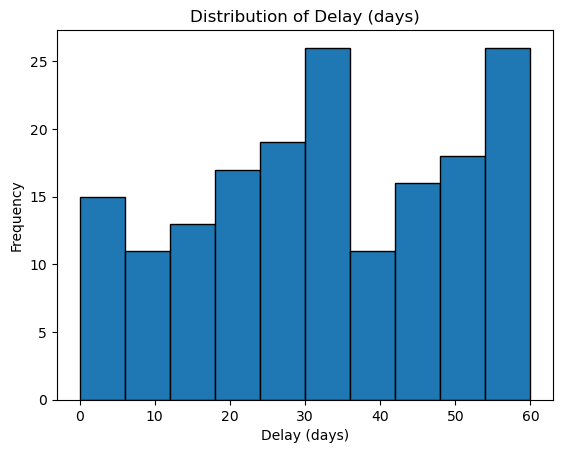

In [33]:
#debuging and analyzing to review data distribution
import matplotlib.pyplot as plt

plt.hist(filtered_df['Delay (days)'], bins=10, edgecolor='black')
plt.title('Distribution of Delay (days)')
plt.xlabel('Delay (days)')
plt.ylabel('Frequency')
plt.show()

In [35]:
# Adjusting the Z-score threshold to 1.8
z_score_outliers = filtered_df[filtered_df['Z-score'].abs() > 1.8]
print(z_score_outliers[['ISO3 Code', 'Delay (days)', 'Z-score']])


    ISO3 Code  Delay (days)   Z-score
293       ARG             0 -1.833428
390       MEX             0 -1.833428


In [43]:
# Writing the results to a CSV file
z_score_outliers.to_csv('Outliers.csv', columns=['ISO3 Code','Country Name', 'Delay (days)', 'Region'], index=False)